In [2]:
import pandas as pd
import numpy as np

In [6]:


def calculate_total_charging_duration(df, min_periods=3):
    # Resample the DataFrame to daily frequency and calculate the sum of consecutive periods
    daily_sum = df.resample('D').sum()
    
    # Filter out charging events without at least the minimum number of consecutive periods
    filtered_sum = daily_sum.mask(daily_sum < min_periods, 0)
    
    # Calculate the total charging duration for each day
    total_duration = filtered_sum.sum(axis=1)
    
    return total_duration


# Generate dummy data
np.random.seed(42)
num_vehicles = 3
start_date = '2023-05-01'
end_date = '2023-05-08'
time_interval = '10T'

dates = pd.date_range(start=start_date, end=end_date, freq=time_interval)
data = np.random.choice([0, 1], size=(len(dates), num_vehicles))

df = pd.DataFrame(data, index=dates, columns=[f'Vehicle {i+1}' for i in range(num_vehicles)])

# Test the calculate_total_charging_duration function
total_charging_duration = calculate_total_charging_duration(df)
print(total_charging_duration)


2023-05-01    221
2023-05-02    219
2023-05-03    205
2023-05-04    209
2023-05-05    206
2023-05-06    219
2023-05-07    219
2023-05-08      0
Freq: D, dtype: int64


In [7]:
time_series = pd.read_csv('../data/NREL/PEV-Profiles-L2-no-household-ID.csv',index_col=[0])
time_series['Vehicle 1']

Time
1/1/2010 0:00       0
1/1/2010 0:10       0
1/1/2010 0:20       0
1/1/2010 0:30       0
1/1/2010 0:40       0
                   ..
12/31/2010 23:10    0
12/31/2010 23:20    0
12/31/2010 23:30    0
12/31/2010 23:40    0
12/31/2010 23:50    0
Name: Vehicle 1, Length: 52560, dtype: int64

In [8]:
def calculate_charging_duration(time_series):
    start_times = []
    end_times = []
    charging_durations = []
    
    charging = False
    start_time = None
    
    for i, power in enumerate(time_series):
        if power == 6600 and not charging:
            start_time = time_series.index[i]
            charging = True
        elif power == 0 and charging:
            start_times.append(start_time)
            end_times.append(time_series.index[i-1])
            charging_durations.append(time_series.index[i-1] - start_time)
            charging = False

    # Check if charging event extends until the last timestamp
    if charging:
        start_times.append(start_time)
        end_times.append(time_series.index[-1])
        charging_durations.append(time_series.index[-1] - start_time)

    return start_times, end_times, charging_durations

# Example usage:
#time_index = pd.date_range(start='2010-01-01', periods=13, freq='10min')
#time_series = pd.Series([0, 0, 6600, 6600, 6600, 6600, 0, 0, 0, 6600, 6600, 0, 0], index=time_index)
time_series = pd.read_csv('../data/NREL/PEV-Profiles-L2-no-household-ID.csv',index_col=[0])
start_times, end_times, charging_durations = calculate_charging_duration(time_series['Vehicle 1'])

for i in range(len(start_times)):
    print(f"Charging Event {i+1}:")
    print(f"Start Time: {start_times[i]}")
    print(f"End Time: {end_times[i]}")
    print(f"Duration: {charging_durations[i]}")
    print()


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [16]:
def calculate_charging_durations(dataframe):
    charging_durations = []

    for date in pd.Series(dataframe.index.date).unique():
        daily_data = dataframe.loc[dataframe.index.date == date]
        start_times = []
        end_times = []

        for column in daily_data.columns:
            charging = False
            start_time = None

            for i, power in enumerate(daily_data[column]):
                if power == 6600 and not charging:
                    start_time = daily_data.index[i]
                    charging = True
                elif power == 0 and charging:
                    start_times.append(start_time)
                    end_times.append(daily_data.index[i - 1])
                    charging = False

            # Check if charging event extends until the last timestamp
            if charging:
                start_times.append(start_time)
                end_times.append(daily_data.index[-1])

        charging_durations.extend([end - start for start, end in zip(start_times, end_times)])

    durations_dataframe = pd.DataFrame(charging_durations, columns=['Charging Duration'])
    durations_dataframe.index.name = 'Date'

    return durations_dataframe

time_series = pd.read_csv('../data/NREL/PEV-Profiles-L2-no-household-ID.csv',index_col=[0],parse_dates=True)

charging_durations_df = calculate_charging_durations(time_series)
print(charging_durations_df)



       Charging Duration
Date                    
0        0 days 00:20:00
1        0 days 00:00:00
2        0 days 01:10:00
3        0 days 00:50:00
4        0 days 00:00:00
...                  ...
254457   0 days 00:10:00
254458   0 days 00:00:00
254459   0 days 00:10:00
254460   0 days 00:00:00
254461   0 days 00:50:00

[254462 rows x 1 columns]


In [20]:
time_series[['Vehicle 1']]

,Vehicle 1
Time,
2010-01-01 00:00:00,0
2010-01-01 00:10:00,0
2010-01-01 00:20:00,0
2010-01-01 00:30:00,0
2010-01-01 00:40:00,0
...,...
2010-12-31 23:10:00,0
2010-12-31 23:20:00,0
2010-12-31 23:30:00,0


In [29]:
time_series = pd.read_csv('../data/NREL/PEV-Profiles-L2-no-household-ID.csv')
time_series["Time"] = pd.to_datetime(time_series["Time"])
time_series

,Time,Vehicle 1,Vehicle 2,Vehicle 3,Vehicle 4,Vehicle 5,Vehicle 6,Vehicle 7,Vehicle 8,Vehicle 9,...,Vehicle 339,Vehicle 340,Vehicle 341,Vehicle 342,Vehicle 343,Vehicle 344,Vehicle 345,Vehicle 346,Vehicle 347,Vehicle 348
0,2010-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-01 00:10:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-01 00:20:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-01 00:30:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-01 00:40:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,2010-12-31 23:10:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52556,2010-12-31 23:20:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52557,2010-12-31 23:30:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52558,2010-12-31 23:40:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

# Load the data
time_series = pd.read_csv('../data/NREL/PEV-Profiles-L2-no-household-ID.csv')
time_series["Time"] = pd.to_datetime(time_series["Time"])

data = time_series[["Vehicle 1","Time"]]
data.rename(columns={"Vehicle 1":"value"},inplace=True)

# Preprocess the data
data = data[data["value"] == 6600]
data["duration"] = data["Time"].diff() / np.timedelta64(10, "m")

# Impute the missing values
imputer = SimpleImputer(strategy="mean")
imputed_data = imputer.fit_transform(data[["duration"]])

# Cluster the data
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(imputed_data)

# Identify the 3 clusters with the largest number of data points
counts = np.bincount(labels)
indices = np.argsort(counts)[::-1][:3]

# Print the results
print("The 3 most significant clusters of charging durations are:")
for i in indices:
    print("Cluster {}: {} data points".format(i, counts[i]))



The 3 most significant clusters of charging durations are:
Cluster 0: 1489 data points
Cluster 1: 277 data points
Cluster 2: 37 data points


C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\2722088529.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={"Vehicle 1":"value"},inplace=True)
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\2722088529.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["duration"] = data["Time"].diff() / np.timedelta64(10, "m")
c:\Users\Shankar Ramharack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4

In [34]:
# Get the cluster centroids
centroids = kmeans.cluster_centers_

# Print the cluster centroids
print("The cluster centroids are:")
for centroid in centroids:
    print(centroid)

The cluster centroids are:
[6.70658078]
[115.90252708]
[280.37837838]


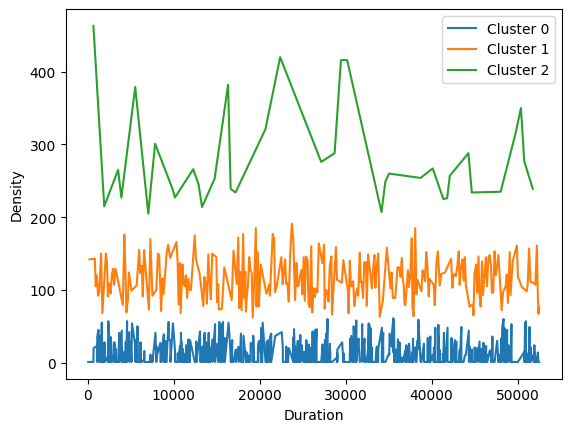

In [39]:

import matplotlib.pyplot as plt
# Identify the 3 clusters with the largest number of data points
counts = np.bincount(labels)
indices = np.argsort(counts)[::-1][:3]

# Plot the KDEs of the values in each cluster
for i in indices:
    cluster_data = data[labels == i]
    duration = cluster_data["duration"]
    plt.plot(duration, label="Cluster {}".format(i))

# Label the axes
plt.xlabel("Duration")
plt.ylabel("Density")
plt.legend()

# Show the plot
plt.show()

c:\Users\Shankar Ramharack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1932214857.py:34: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=3, random_state=0).fit(duration.values.reshape(-1, 1))


<Figure size 1000x400 with 0 Axes>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from scipy.stats import norm

# Set the number of days and intervals per day
num_days = 3
intervals_per_day = 24 * 6  # 24 hours * 6 intervals per hour (10 minutes each)

# Generate timestamps for the intervals
timestamps = pd.date_range(start='2023-05-28', periods=num_days * intervals_per_day, freq='10min')

# Generate random charging data (0 or 1) for each column
num_columns = 5
data = np.random.randint(2, size=(num_days * intervals_per_day, num_columns))

# Create the DataFrame with timestamps and columns
df = pd.DataFrame(data, columns=[f'Column {i+1}' for i in range(num_columns)])
df['Timestamp'] = timestamps
df = df[['Timestamp'] + [f'Column {i+1}' for i in range(num_columns)]]

# Add NaN values to the DataFrame
df.iloc[5, 1] = np.nan
df.iloc[15, 3] = np.nan


In [54]:
df = pd.read_csv('../data/NREL/PEV-Profiles-L2-no-household-ID.csv')
df["Timestamp"] = pd.to_datetime(df["Time"])
df_bard = df.drop("Time",axis=1)



In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set the number of days and intervals per day
num_days = 3
intervals_per_day = 24 * 6  # 24 hours * 6 intervals per hour (10 minutes each)

# Generate timestamps for the intervals
timestamps = pd.date_range(start='2023-05-28', periods=num_days * intervals_per_day, freq='10min')

# Generate random charging data (0 or 6600) for each column
num_columns = 5
data = np.random.choice([0, 6600], size=(num_days * intervals_per_day, num_columns))

# Create the DataFrame with timestamps and columns
df = pd.DataFrame(data, columns=[f'Column {i+1}' for i in range(num_columns)], index=timestamps)

# Function to calculate duration of charging events
def calculate_charging_durations(df):
    durations = []
    for column in df.columns:
        charging_duration = 0
        charging = False
        for value in df[column]:
            if value == 6600 and not charging:
                charging = True
                charging_duration = 10
            elif value == 6600 and charging:
                charging_duration += 10
            elif value == 0 and charging:
                durations.append(charging_duration)
                charging = False
        if charging:
            durations.append(charging_duration)
    return durations

# Calculate durations for each day
all_durations = []
for day in range(num_days):
    start_index = day * intervals_per_day
    end_index = (day + 1) * intervals_per_day
    daily_durations = calculate_charging_durations(df[start_index:end_index])
    all_durations.append(daily_durations)


In [64]:
all_durations

[[10,
  50,
  10,
  10,
  20,
  80,
  20,
  10,
  10,
  10,
  20,
  10,
  30,
  40,
  10,
  10,
  10,
  10,
  20,
  70,
  30,
  70,
  20,
  20,
  30,
  30,
  10,
  10,
  10,
  50,
  40,
  20,
  20,
  20,
  20,
  20,
  20,
  40,
  60,
  20,
  40,
  40,
  10,
  10,
  10,
  20,
  10,
  20,
  20,
  20,
  10,
  10,
  60,
  10,
  50,
  10,
  10,
  10,
  40,
  50,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  20,
  20,
  20,
  20,
  10,
  20,
  20,
  20,
  20,
  10,
  10,
  60,
  10,
  20,
  10,
  80,
  30,
  20,
  10,
  20,
  10,
  10,
  60,
  50,
  10,
  10,
  30,
  10,
  10,
  10,
  30,
  10,
  20,
  30,
  20,
  30,
  20,
  20,
  30,
  30,
  10,
  20,
  10,
  20,
  30,
  20,
  10,
  20,
  10,
  10,
  10,
  10,
  40,
  20,
  10,
  10,
  10,
  10,
  20,
  40,
  20,
  20,
  10,
  30,
  10,
  20,
  20,
  20,
  10,
  20,
  20,
  20,
  10,
  40,
  20,
  30,
  10,
  10,
  70,
  20,
  20,
  50,
  10,
  10,
  10,
  10,
  10,
  10,
  10,
  30,
  10,
  40,
  10,
  10,
  10,
  10,
  10,
  10,
  30,
  50

In [66]:

# Convert the durations to minutes as integers
all_durations_minutes = [int(duration / 10) for daily_durations in all_durations for duration in daily_durations]
all_durations_minutes


[1,
 5,
 1,
 1,
 2,
 8,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 4,
 1,
 1,
 1,
 1,
 2,
 7,
 3,
 7,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 5,
 4,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 6,
 2,
 4,
 4,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 6,
 1,
 5,
 1,
 1,
 1,
 4,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 6,
 1,
 2,
 1,
 8,
 3,
 2,
 1,
 2,
 1,
 1,
 6,
 5,
 1,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 2,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 4,
 2,
 1,
 1,
 1,
 1,
 2,
 4,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 4,
 2,
 3,
 1,
 1,
 7,
 2,
 2,
 5,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 4,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 5,
 1,
 3,
 1,
 3,
 1,
 1,
 1,
 1,
 8,
 2,
 1,
 1,
 2,
 1,
 5,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 4,
 1,
 3,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 4,
 2,
 7,
 2,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 5,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 5,
 3,
 1,
 7,
 1,
 1,
 2,
 3,
 1,
 5,
 3,
 2,
 2,
 2,
 3,
 1,
 1,


In [78]:
# Create a DataFrame of the durations
duration_df = pd.DataFrame({'Duration (minutes)':np.concatenate(all_durations,dtype=object)})

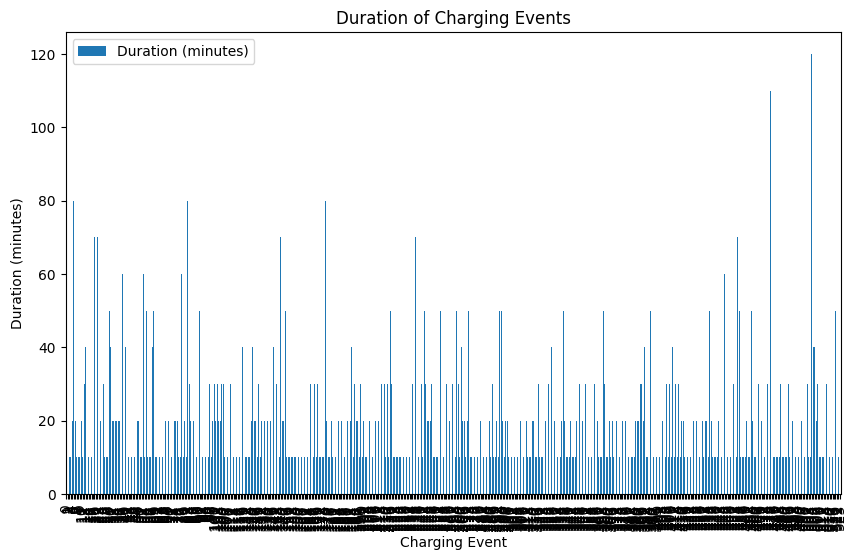

In [79]:
# Plot the duration DataFrame
duration_df.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Charging Event')
plt.ylabel('Duration (minutes)')
plt.title('Duration of Charging Events')
plt.show()


c:\Users\Shankar Ramharack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Shankar Ramharack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_birch.py:726: ConvergenceWarning: Number of subclusters found (1) by BIRCH is less than (3). Decrease the threshold.
  warnings.warn(


           Model                                             Labels
0        K-means  [2, 2, 2, 2, 0, 0, 2, 1, 1, 2, 2, 2, 1, 2, 0, ...
1         DBSCAN  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2  Agglomerative  [2, 0, 2, 2, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, ...
3          Birch  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4         OPTICS  [0, 14, -1, 9, 71, 30, 8, 62, -1, -1, -1, -1, ...
5      MeanShift  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...


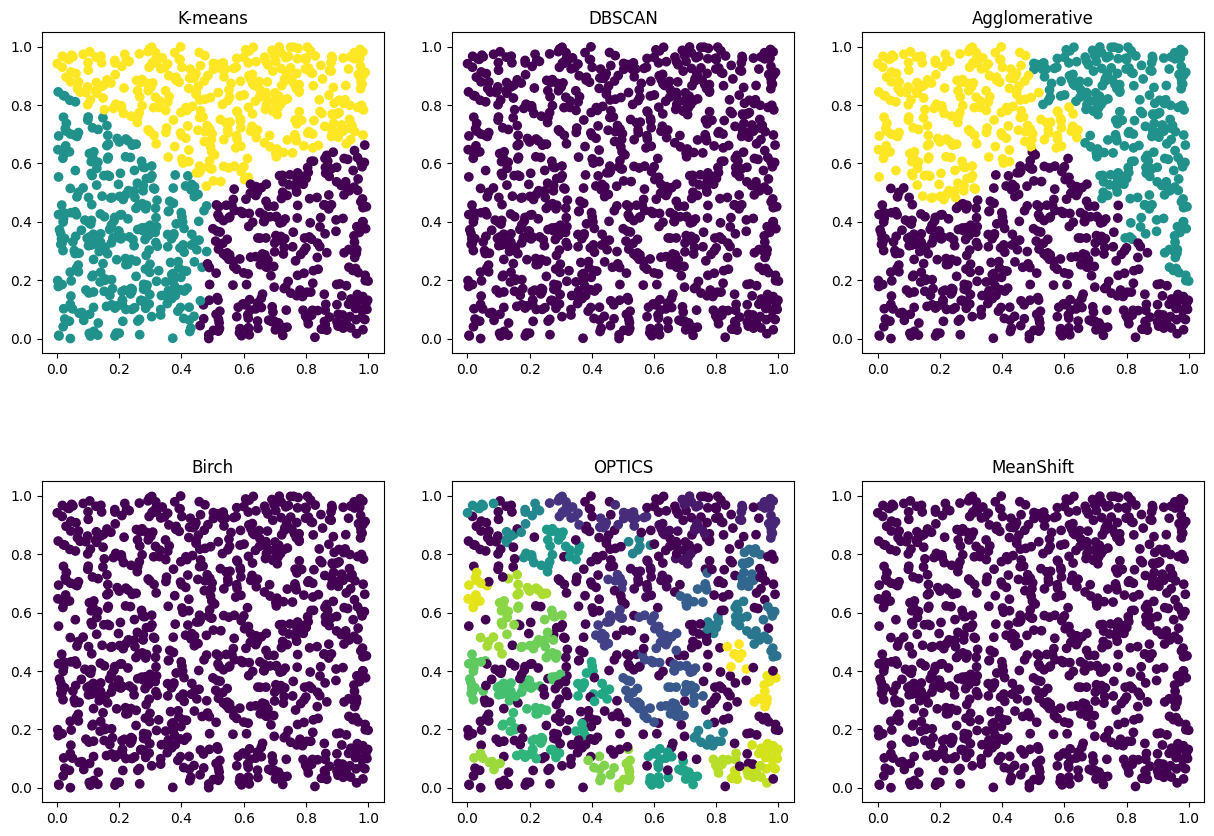

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch, OPTICS, MeanShift

# Generate random data with 1000 elements
np.random.seed(0)
data = np.random.rand(1000, 2)

# Define the clustering models
models = [
    ("K-means", KMeans(n_clusters=3)),
    ("DBSCAN", DBSCAN(eps=0.3, min_samples=5)),
    ("Agglomerative", AgglomerativeClustering(n_clusters=3)),
    ("Birch", Birch(n_clusters=3)),
    ("OPTICS", OPTICS(min_samples=5)),
    ("MeanShift", MeanShift(bandwidth=0.5))
]

# Perform clustering and store the results
results = []
for name, model in models:
    labels = model.fit_predict(data)
    results.append({"Model": name, "Labels": labels})

# Create a DataFrame to display the model parameters and labels
df = pd.DataFrame(results)

# Print the table of model parameters and labels
print(df)

# Plot the clustering results
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)
for ax, result in zip(axes.flatten(), results):
    ax.scatter(data[:, 0], data[:, 1], c=result["Labels"], cmap="viridis")
    ax.set_title(result["Model"])

plt.show()


In [86]:
charging_events = np.concatenate(all_durations)

OpenAI: Certainly! I'll explain the parameters and their results for each of the clustering methods used in the code.

1. K-means:
   - Parameters: The main parameter for K-means is the number of clusters (`n_clusters`). In the example, we set `n_clusters=3`.
   - Results: K-means assigns each data point to one of the clusters based on the nearest centroid. The results are represented by the cluster labels assigned to each data point. The quality of the clustering can be evaluated using metrics such as the within-cluster sum of squares (WCSS) or silhouette score.

2. DBSCAN:
   - Parameters: DBSCAN has two important parameters: `eps` and `min_samples`. `eps` determines the radius within which neighboring points are considered part of the same cluster. `min_samples` specifies the minimum number of points required to form a dense region.
   - Results: DBSCAN assigns each data point to a cluster, noise (denoted as -1), or the "unlabeled" category (denoted as 0). It is capable of discovering clusters of arbitrary shape and handling noise effectively.

3. Agglomerative Clustering:
   - Parameters: Agglomerative Clustering uses a hierarchical approach to clustering. The key parameter is `n_clusters`, which defines the desired number of clusters.
   - Results: Agglomerative Clustering builds a hierarchy of clusters by successively merging the closest pair of clusters. The results are represented by the cluster labels assigned to each data point.

4. Birch:
   - Parameters: Birch is a hierarchical clustering algorithm that uses a tree-based structure to represent the data. The main parameter is `n_clusters`, which defines the desired number of clusters.
   - Results: Birch constructs a clustering feature tree (CF Tree) and assigns data points to leaf nodes, which represent the clusters. The results are represented by the cluster labels assigned to each data point.

5. OPTICS:
   - Parameters: OPTICS is a density-based clustering algorithm and has parameters such as `min_samples` and `eps`. `min_samples` specifies the minimum number of samples in a neighborhood to form a core point, and `eps` determines the maximum distance to consider when forming density-based clusters.
   - Results: OPTICS assigns each data point to a cluster or marks it as an outlier (denoted as -1). It also provides a reachability distance and ordering, which can be used to analyze the density-based structure of the data.

6. MeanShift:
   - Parameters: MeanShift is a density-based clustering algorithm that does not require specifying the number of clusters. The main parameter is `bandwidth`, which defines the radius or scale for the kernel function.
   - Results: MeanShift assigns each data point to a cluster based on the local density estimation. The results are represented by the cluster labels assigned to each data point.

Interpreting the results of clustering methods typically involves analyzing the assigned cluster labels, visualizing the clusters, and evaluating the quality of the clustering. The choice of clustering method depends on the specific characteristics of the data and the desired properties of the clusters, such as their shape, density, and separation. It is often useful to explore various clustering methods and compare their performance using metrics or visualizations to gain insights into the underlying structure of the data.

In [88]:
import seaborn as sns

C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


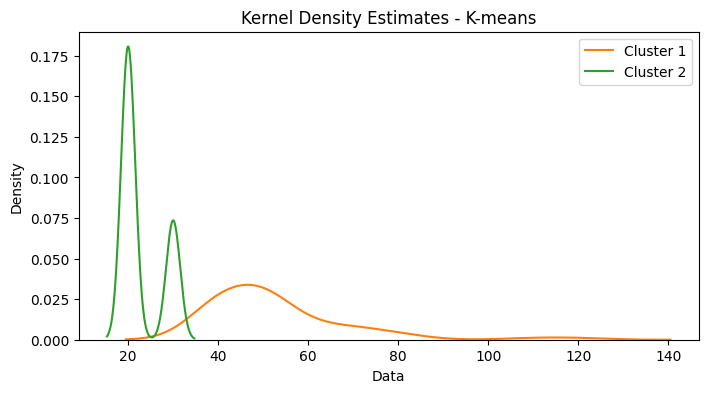

C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users

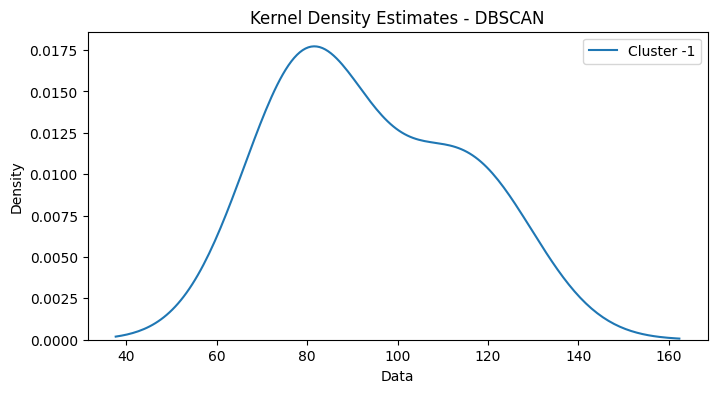

C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


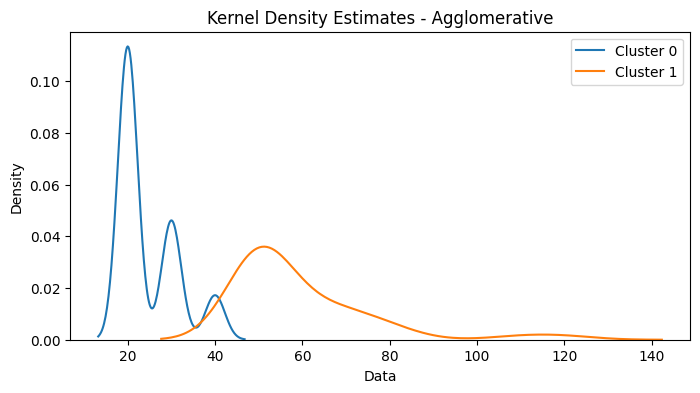

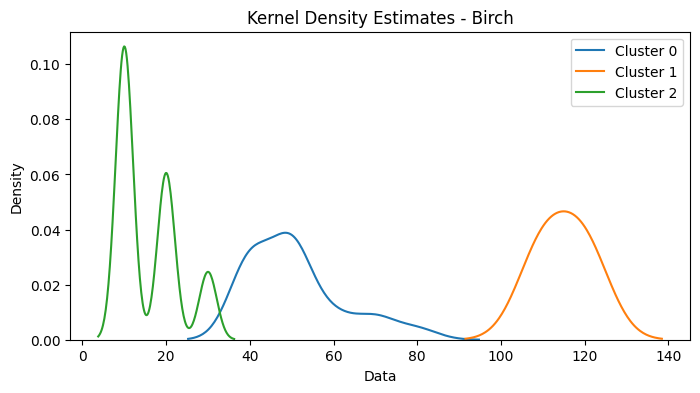

C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users

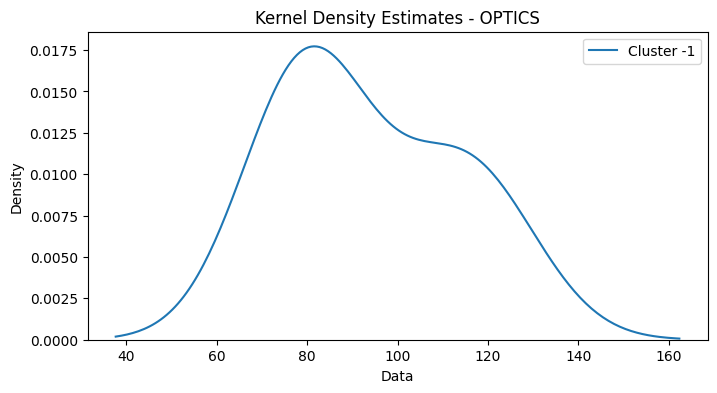

C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\1261435212.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users

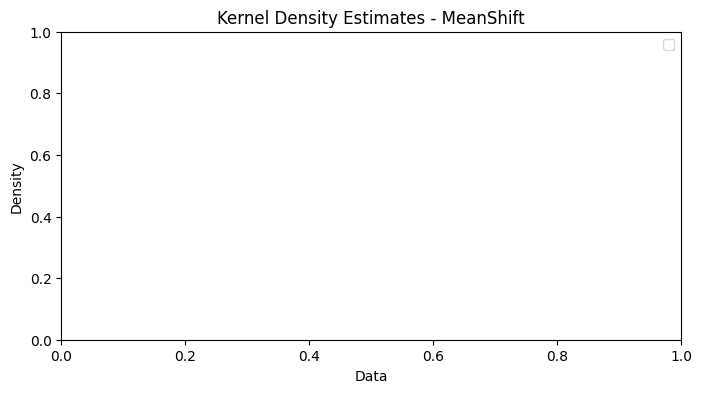

In [89]:
# Perform clustering and generate kernel density estimates
results = []
unplottable_labels = []  # Collect unplottable labels
for name, model in models:
    labels = model.fit_predict(data)
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)
    
    result = {
        "Model": name,
        "Labels": labels,
    }
    results.append(result)

    # Collect unplottable labels
    for label in unique_labels:
        try:
            cluster_data = data[result["Labels"] == label].flatten()
            sns.kdeplot(cluster_data, label=f"Cluster {label}")
        except ValueError:
            unplottable_labels.append((label, name))

# Plot kernel density estimates
for result in results:
    unique_labels = np.unique(result["Labels"])
    num_clusters = len(unique_labels)

    plt.figure(figsize=(8, 4))
    for label in unique_labels:
        cluster_data = data[result["Labels"] == label].flatten()
        sns.kdeplot(cluster_data, label=f"Cluster {label}")

    plt.title(f"Kernel Density Estimates - {result['Model']}")
    plt.xlabel("Data")
    plt.ylabel("Density")
    plt.legend()
    plt.show()

# Display unplottable labels
if unplottable_labels:
    print("Labels that could not be plotted:")
    for label, model in unplottable_labels:
        print(f"Cluster {label} - {model}")
else:
    print("All clusters have been plotted successfully.")

In this code, we fit the clustering models to the data and extract the labels assigned to each data point. Based on the number of clusters detected and the specific characteristics of each model, we provide interpretations about the charging duration.

The code covers various scenarios:

If only one cluster is detected, it implies a consistent charging duration without significant variations.
For models like K-means, Agglomerative, and Birch, where a fixed number of clusters is used, the inference is that different charging duration patterns exist, and the dataset can be divided into distinct groups.
For DBSCAN and OPTICS, where the number of clusters is adaptive and can include noise points, the inferences consider the number of clusters and noise points. If no clear clusters are detected, the inference is that the charging duration does not show any clear patterns or there might be noise/outliers in the data.
For MeanShift, where the number of clusters is adaptive based on density, the inference is that the charging duration forms different groups based on the density of data points, and clusters are identified based on local density estimation.

Below error handling is done for zero variance cases

In [91]:
import warnings

c:\Users\Shankar Ramharack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


Model: K-means
----------
Number of clusters: 3
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




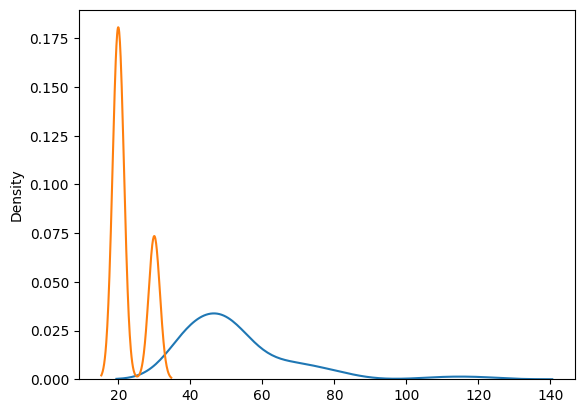

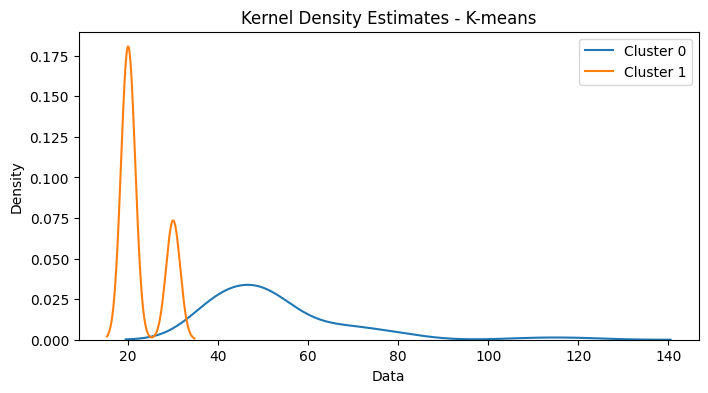

Labels that could not be plotted:
Cluster 2 - K-means
Model: DBSCAN
----------
Number of clusters: 3
Number of noise points: 5
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


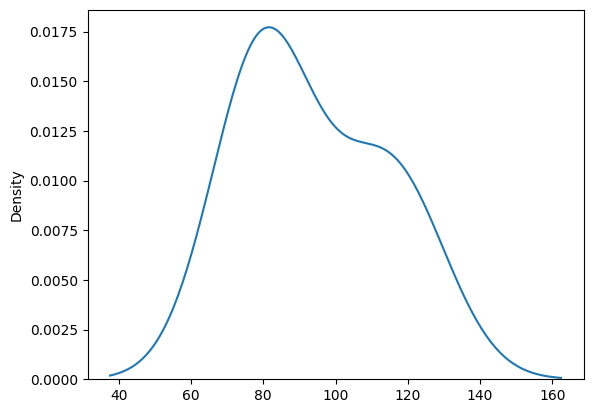

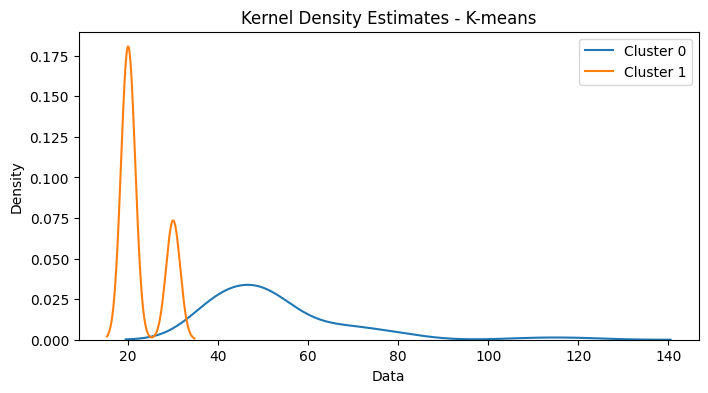

Model: DBSCAN
----------
Number of clusters: 7
Number of noise points: 5
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


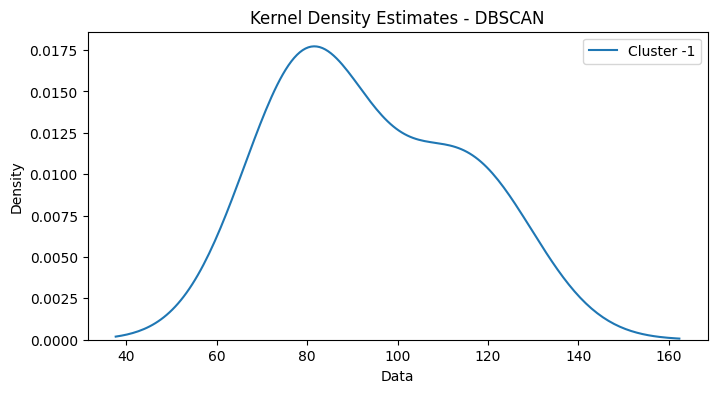

Labels that could not be plotted:
Cluster 2 - K-means
Cluster 0 - DBSCAN
Cluster 1 - DBSCAN
Cluster 2 - DBSCAN
Cluster 3 - DBSCAN
Cluster 4 - DBSCAN
Cluster 5 - DBSCAN
Cluster 6 - DBSCAN
Model: Agglomerative
----------
Number of clusters: 3
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


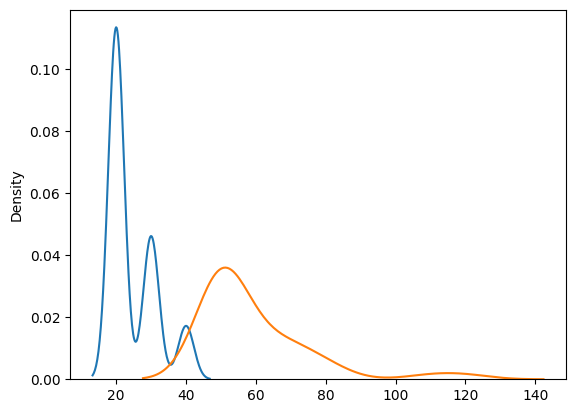

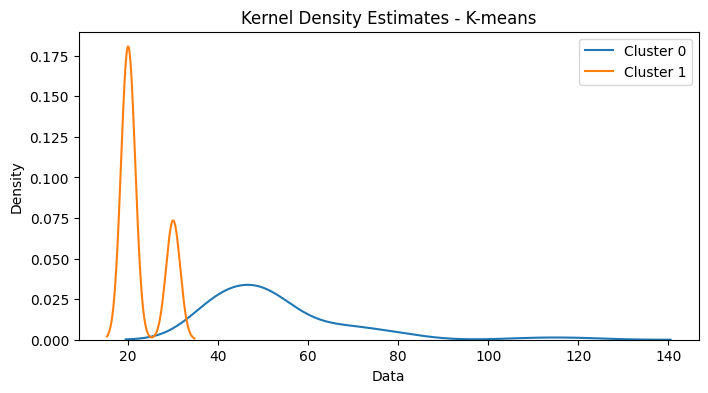

Model: Agglomerative
----------
Number of clusters: 8
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


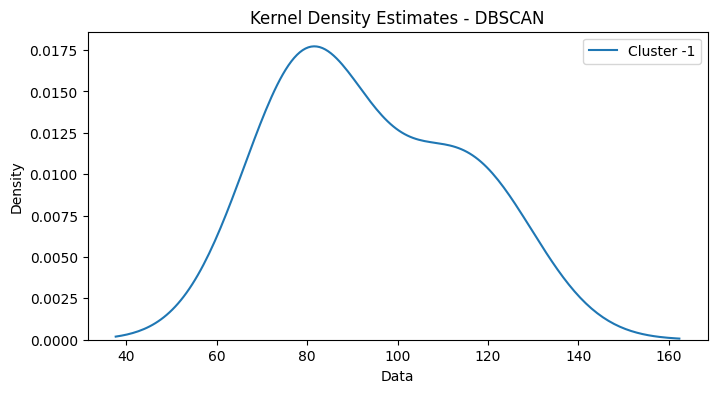

Model: Agglomerative
----------
Number of clusters: 3
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


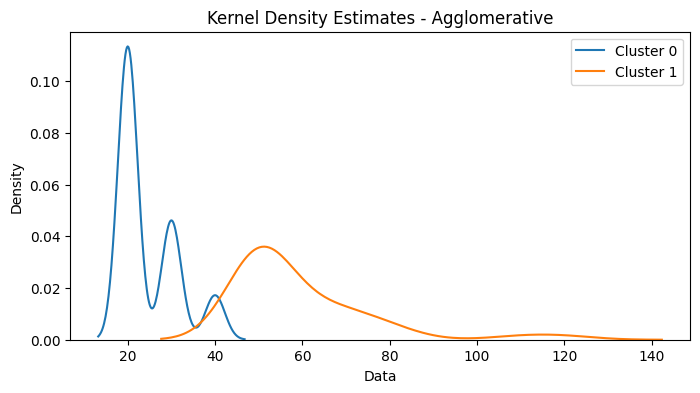

Labels that could not be plotted:
Cluster 2 - K-means
Cluster 0 - DBSCAN
Cluster 1 - DBSCAN
Cluster 2 - DBSCAN
Cluster 3 - DBSCAN
Cluster 4 - DBSCAN
Cluster 5 - DBSCAN
Cluster 6 - DBSCAN
Cluster 2 - Agglomerative
Model: Birch
----------
Number of clusters: 3
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


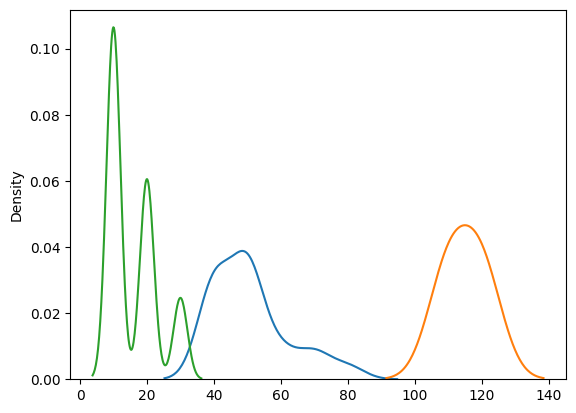

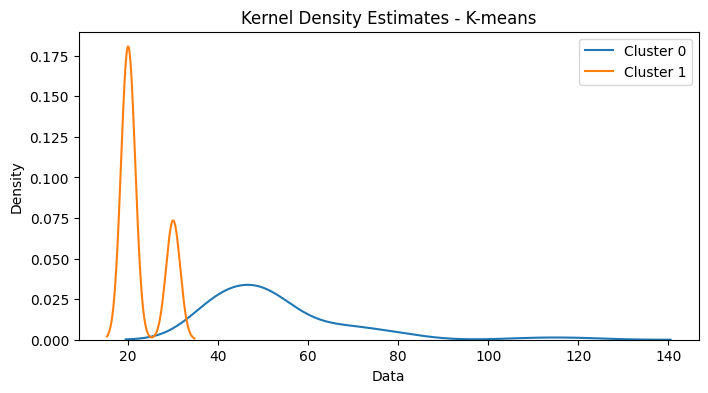

Model: Birch
----------
Number of clusters: 8
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


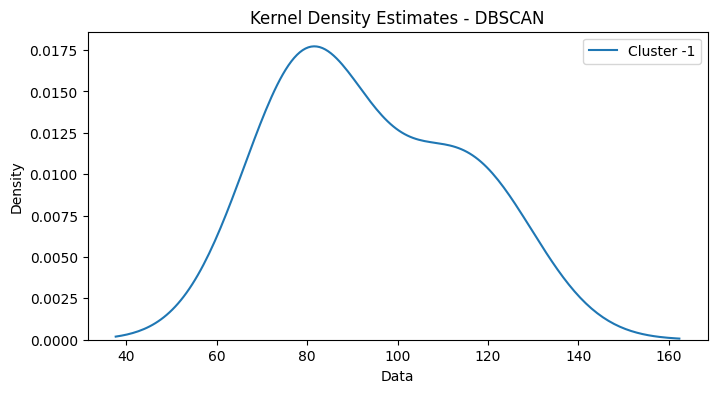

Model: Birch
----------
Number of clusters: 3
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


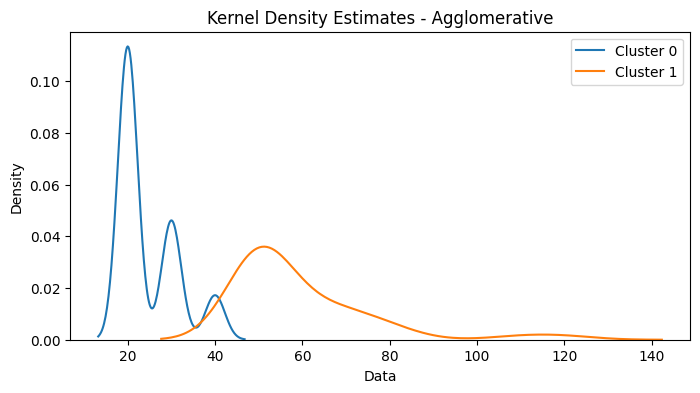

Model: Birch
----------
Number of clusters: 3
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




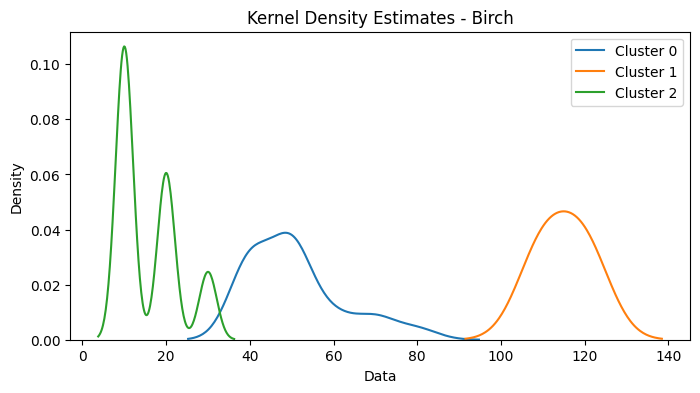

Labels that could not be plotted:
Cluster 2 - K-means
Cluster 0 - DBSCAN
Cluster 1 - DBSCAN
Cluster 2 - DBSCAN
Cluster 3 - DBSCAN
Cluster 4 - DBSCAN
Cluster 5 - DBSCAN
Cluster 6 - DBSCAN
Cluster 2 - Agglomerative


c:\Users\Shankar Ramharack\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


Model: OPTICS
----------
Number of clusters: 3
Number of noise points: 5
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




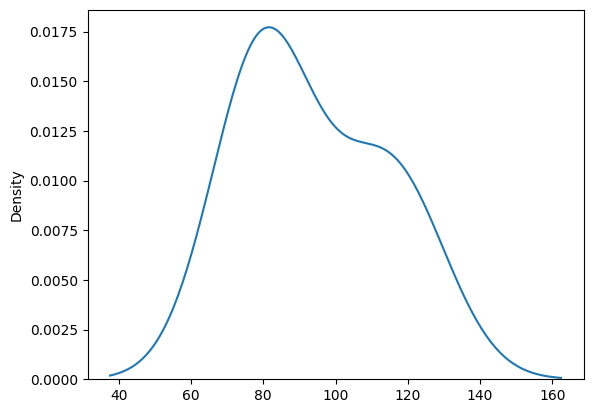

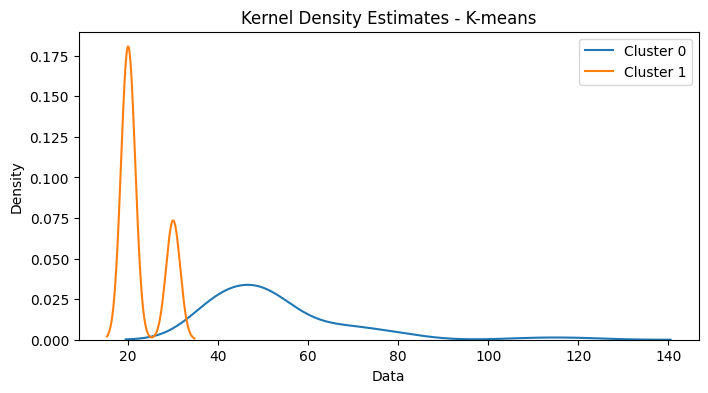

Model: OPTICS
----------
Number of clusters: 7
Number of noise points: 5
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


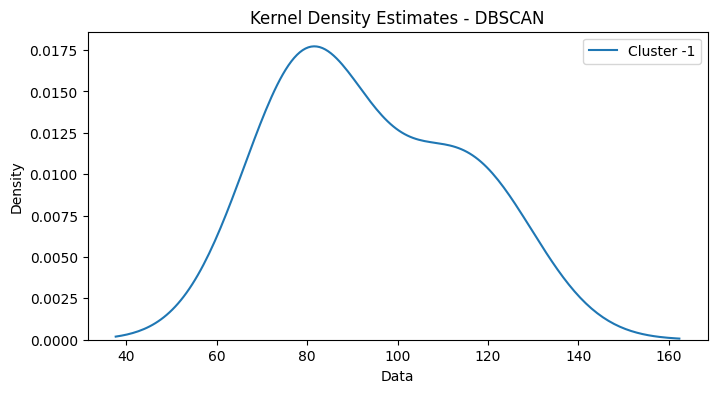

Model: OPTICS
----------
Number of clusters: 3
Number of noise points: 5
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


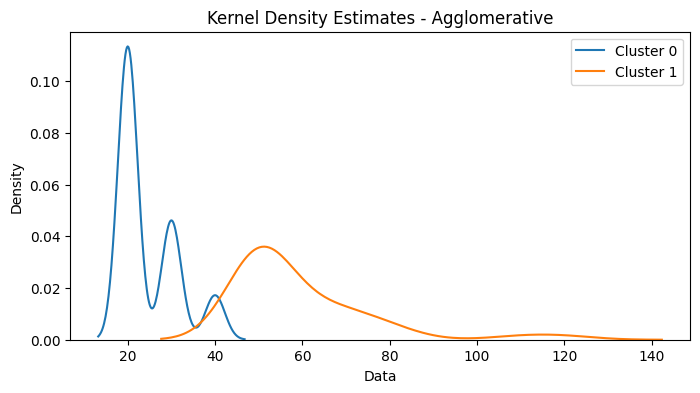

Model: OPTICS
----------
Number of clusters: 3
Number of noise points: 5
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




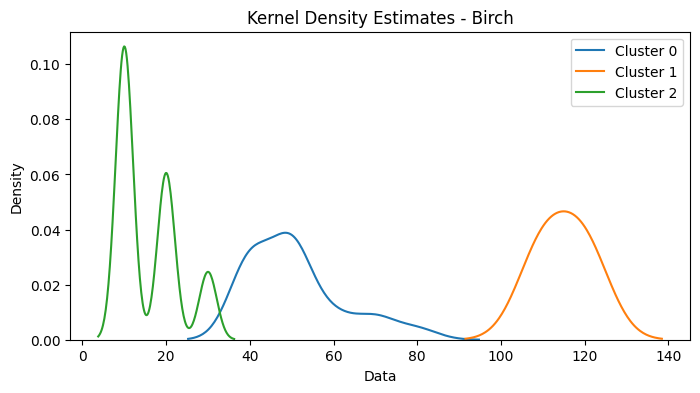

Model: OPTICS
----------
Number of clusters: 7
Number of noise points: 5
Inference: Multiple clusters detected.
There are different charging duration patterns.
The dataset can be divided into distinct groups based on charging duration.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


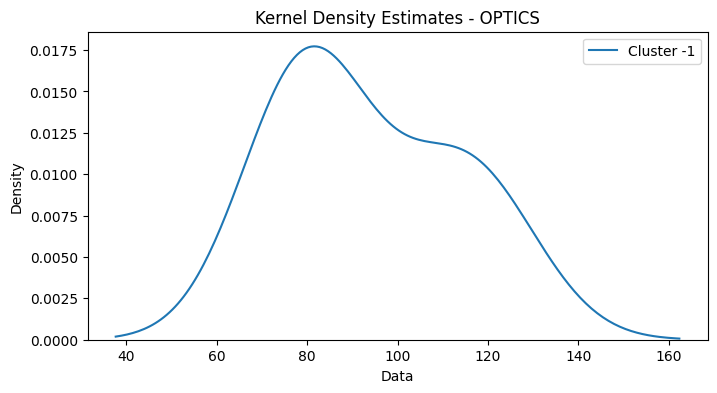

Labels that could not be plotted:
Cluster 2 - K-means
Cluster 0 - DBSCAN
Cluster 1 - DBSCAN
Cluster 2 - DBSCAN
Cluster 3 - DBSCAN
Cluster 4 - DBSCAN
Cluster 5 - DBSCAN
Cluster 6 - DBSCAN
Cluster 2 - Agglomerative
Cluster 0 - OPTICS
Cluster 1 - OPTICS
Cluster 2 - OPTICS
Cluster 3 - OPTICS
Cluster 4 - OPTICS
Cluster 5 - OPTICS
Cluster 6 - OPTICS
Model: MeanShift
----------
Inference: Adaptive number of clusters.
The charging duration forms different groups based on the density of data points.
Clusters are identified based on local density estimation.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


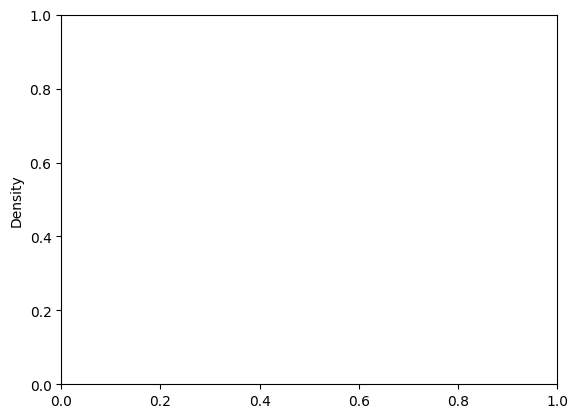

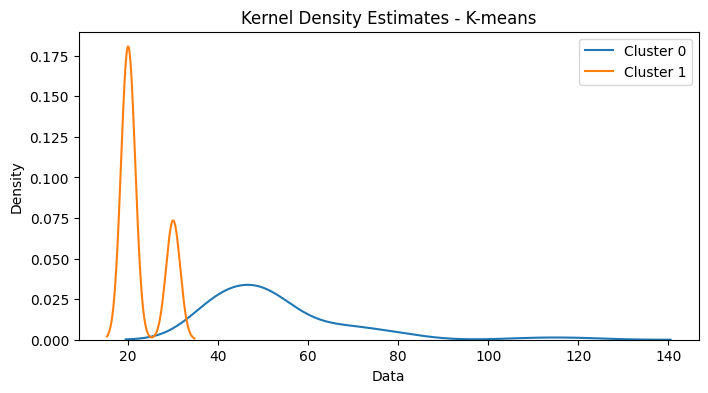

Model: MeanShift
----------
Inference: Adaptive number of clusters.
The charging duration forms different groups based on the density of data points.
Clusters are identified based on local density estimation.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


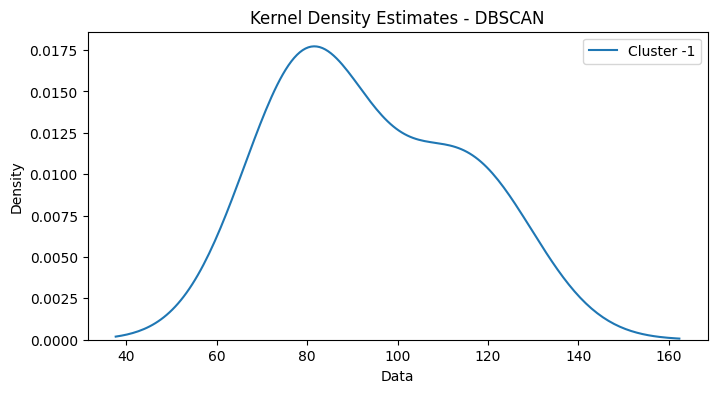

Model: MeanShift
----------
Inference: Adaptive number of clusters.
The charging duration forms different groups based on the density of data points.
Clusters are identified based on local density estimation.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


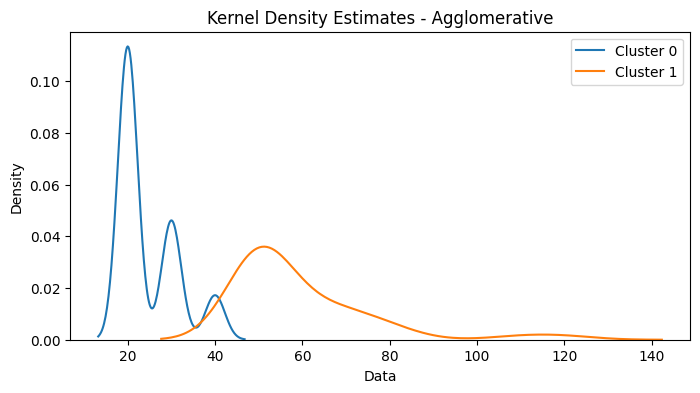

Model: MeanShift
----------
Inference: Adaptive number of clusters.
The charging duration forms different groups based on the density of data points.
Clusters are identified based on local density estimation.




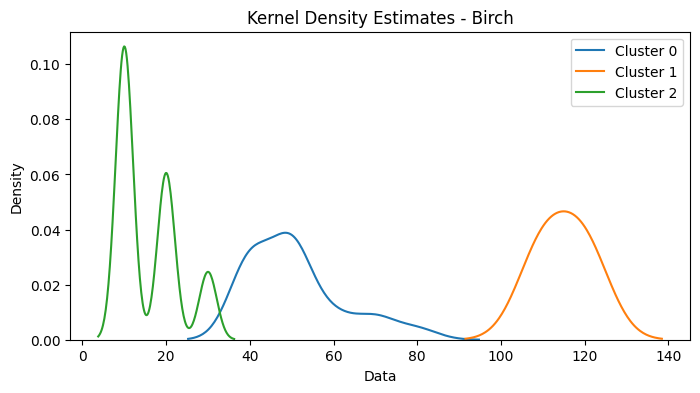

Model: MeanShift
----------
Inference: Adaptive number of clusters.
The charging duration forms different groups based on the density of data points.
Clusters are identified based on local density estimation.




C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


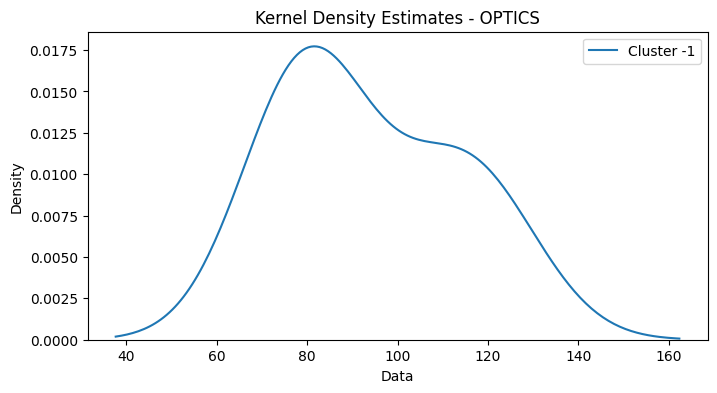

C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")
C:\Users\Shankar Ramharack\AppData\Local\Temp\ipykernel_2256\3606078961.py:108: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(cluster_data, label=f"Cluster {label}")


Model: MeanShift
----------
Inference: Adaptive number of clusters.
The charging duration forms different groups based on the density of data points.
Clusters are identified based on local density estimation.




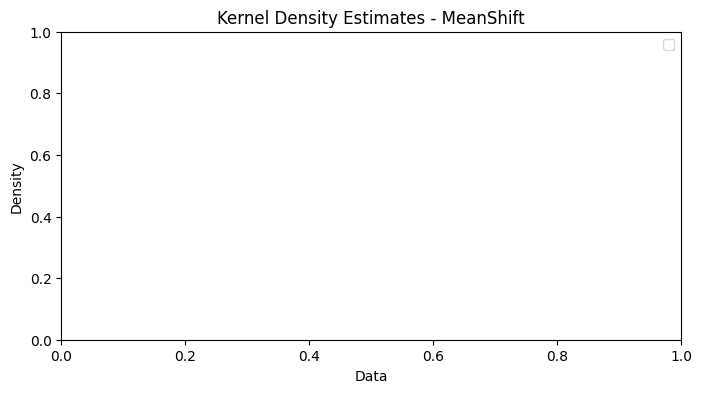

Labels that could not be plotted:
Cluster 2 - K-means
Cluster 0 - DBSCAN
Cluster 1 - DBSCAN
Cluster 2 - DBSCAN
Cluster 3 - DBSCAN
Cluster 4 - DBSCAN
Cluster 5 - DBSCAN
Cluster 6 - DBSCAN
Cluster 2 - Agglomerative
Cluster 0 - OPTICS
Cluster 1 - OPTICS
Cluster 2 - OPTICS
Cluster 3 - OPTICS
Cluster 4 - OPTICS
Cluster 5 - OPTICS
Cluster 6 - OPTICS
Cluster 0 - MeanShift
Cluster 1 - MeanShift
Cluster 2 - MeanShift
Cluster 3 - MeanShift
Cluster 4 - MeanShift
Cluster 5 - MeanShift
Cluster 6 - MeanShift
Cluster 7 - MeanShift
Cluster 8 - MeanShift
Cluster 9 - MeanShift


In [94]:

data = charging_events


# Reshape the data to a 2D array
data = data.reshape(-1, 1)

# Define the clustering models
models = [
    ("K-means", KMeans(n_clusters=3)),
    ("DBSCAN", DBSCAN(eps=0.3, min_samples=5)),
    ("Agglomerative", AgglomerativeClustering(n_clusters=3)),
    ("Birch", Birch(n_clusters=3)),
    ("OPTICS", OPTICS(min_samples=5)),
    ("MeanShift", MeanShift(bandwidth=2))
]

# Perform clustering and generate kernel density estimates
results = []
unplottable_labels = []  # Collect unplottable labels
for name, model in models:
    labels = model.fit_predict(data)
    unique_labels = np.unique(labels)
    num_clusters = len(unique_labels)
    
    result = {
        "Model": name,
        "Labels": labels,
    }
    results.append(result)

    # Collect unplottable labels
    with warnings.catch_warnings(record=True) as w:
        for label in unique_labels:
            cluster_data = data[result["Labels"] == label].flatten()
            sns.kdeplot(cluster_data, label=f"Cluster {label}")
            
            if any("Dataset has 0 variance" in str(warning.message) for warning in w):
                unplottable_labels.append((label, name))

    # Clear warnings to avoid duplicates
    warnings.resetwarnings()

    # Plot kernel density estimates
    for result in results:
        unique_labels = np.unique(result["Labels"])
        num_clusters = len(unique_labels)

        print(f"Model: {name}")
        print("----------")
        
        if num_clusters == 1:
            print("Inference: There is only one cluster detected.")
            print("The charging duration is consistent and does not vary significantly.")
        
        else:
            if name in ["K-means", "Agglomerative", "Birch"]:
                print(f"Number of clusters: {num_clusters}")
                print("Inference: Multiple clusters detected.")
                print("There are different charging duration patterns.")
                print("The dataset can be divided into distinct groups based on charging duration.")
                
            elif name == "DBSCAN":
                num_noise_points = np.sum(labels == -1)
                num_clusters = num_clusters - (1 if -1 in unique_labels else 0)
                
                print(f"Number of clusters: {num_clusters}")
                print(f"Number of noise points: {num_noise_points}")
                
                if num_clusters == 0:
                    print("Inference: No clusters detected.")
                    print("The charging duration does not show any clear patterns.")
                    print("There might be noise or outliers in the data.")
                else:
                    print("Inference: Multiple clusters detected.")
                    print("There are different charging duration patterns.")
                    print("The dataset can be divided into distinct groups based on charging duration.")
                
            elif name == "OPTICS":
                num_noise_points = np.sum(labels == -1)
                num_clusters = num_clusters - (1 if -1 in unique_labels else 0)
                
                print(f"Number of clusters: {num_clusters}")
                print(f"Number of noise points: {num_noise_points}")
                
                if num_clusters == 0:
                    print("Inference: No clusters detected.")
                    print("The charging duration does not show any clear patterns.")
                    print("There might be noise or outliers in the data.")
                elif num_clusters == 1:
                    print("Inference: Only one cluster detected.")
                    print("The charging duration is consistent and does not vary significantly.")
                else:
                    print("Inference: Multiple clusters detected.")
                    print("There are different charging duration patterns.")
                    print("The dataset can be divided into distinct groups based on charging duration.")
            
            elif name == "MeanShift":
                print("Inference: Adaptive number of clusters.")
                print("The charging duration forms different groups based on the density of data points.")
                print("Clusters are identified based on local density estimation.")
        
        print("\n")


        plt.figure(figsize=(8, 4))
        for label in unique_labels:
            cluster_data = data[result["Labels"] == label].flatten()
            sns.kdeplot(cluster_data, label=f"Cluster {label}")

        plt.title(f"Kernel Density Estimates - {result['Model']}")
        plt.xlabel("Data")
        plt.ylabel("Density")
        plt.legend()
        plt.show()

    # Display unplottable labels
    if unplottable_labels:
        print("Labels that could not be plotted:")
        for label, model in unplottable_labels:
            print(f"Cluster {label} - {model}")
    else:
        print("All clusters have been plotted successfully.")
    
    

